In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
from sklearn.impute import SimpleImputer
%matplotlib inline
import scipy
from scipy import stats
from numpy import sqrt

In [36]:
nona=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD\PhD back up\Programing full\R\Datasets\Cell Lines\C9 repeat\C9 repeat.xlsx", 
                   header=0, index_col = 0)
nona

,ALS C9+ 1,ALS C9+ 2,ALS C9+ 3,ALS C9+ 4,ALS C9+ 5,ALS C9+ 6,ALS C9+ 7,ALS C9+ 8,ALS C9- 1,ALS C9- 2,ALS C9- 3,ALS C9- 4,ALS C9- 5,ALS C9- 6,ALS C9- 7,ALS C9- 8
Gene names,,,,,,,,,,,,,,,,
EIF2S3,0.698657,0.646679,0.807499,0.908549,0.997868,1.112924,1.343415,0.599883,1.185932,0.835768,1.279373,1.165202,0.931956,1.752480,0.848354,1.047227
PKLR,0.099536,0.139295,0.172140,0.197341,0.724761,0.307721,0.394863,0.264820,0.225790,0.266896,0.240601,0.221394,0.194350,0.709377,0.258000,0.451406
PSMB5,0.085992,0.047968,0.051696,0.074602,0.163880,0.237047,0.426557,0.177264,0.556235,0.141807,0.102595,0.272391,0.279242,0.186555,0.679736,0.150701
EIF4A2,0.381389,0.434472,0.578926,0.549888,0.458208,0.646331,0.578866,0.415111,0.777317,0.515555,0.736844,0.742968,0.723871,0.596517,0.637523,0.633615
H4C1,0.869202,0.606713,0.501316,0.572365,1.049212,0.701404,0.829886,0.871135,1.229747,0.776401,1.637285,0.868266,1.673708,1.383083,1.014816,1.108895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EIF3D,0.315335,0.010627,0.019306,0.033116,0.224671,0.281790,0.200106,0.094532,0.142464,0.063401,0.220904,0.139605,0.042588,0.249194,0.189691,0.160933
MAP1LC3B2,1.229706,0.147861,0.132578,0.167922,0.363571,0.157513,0.202283,0.147173,0.655826,0.529571,0.431940,0.127509,0.119841,0.213109,0.266098,0.149301
PCYOX1,0.946659,1.277864,1.863558,1.473264,1.153662,1.248054,1.317542,0.938789,1.511368,1.697801,0.940772,1.651634,1.227146,1.249440,1.074259,1.036306


In [37]:
#need to have NA values not 0
nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, EIF2S3 to POTEI
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALS C9+ 1  1149 non-null   float64
 1   ALS C9+ 2  1188 non-null   float64
 2   ALS C9+ 3  1183 non-null   float64
 3   ALS C9+ 4  1188 non-null   float64
 4   ALS C9+ 5  1194 non-null   float64
 5   ALS C9+ 6  1182 non-null   float64
 6   ALS C9+ 7  1181 non-null   float64
 7   ALS C9+ 8  1192 non-null   float64
 8   ALS C9- 1  1166 non-null   float64
 9   ALS C9- 2  1135 non-null   float64
 10  ALS C9- 3  1177 non-null   float64
 11  ALS C9- 4  1161 non-null   float64
 12  ALS C9- 5  1184 non-null   float64
 13  ALS C9- 6  1188 non-null   float64
 14  ALS C9- 7  1193 non-null   float64
 15  ALS C9- 8  1188 non-null   float64
dtypes: float64(16)
memory usage: 153.9+ KB


<AxesSubplot:>

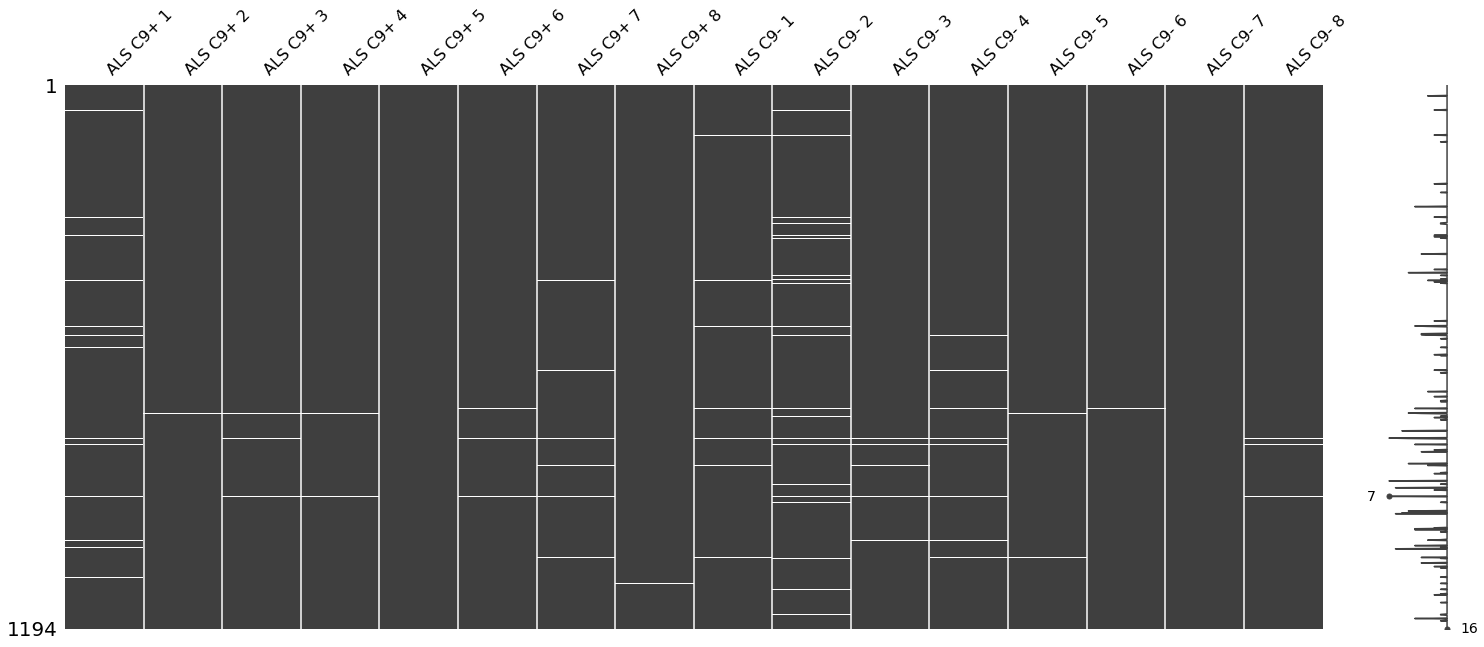

In [28]:
#visualizing the missing values
mno.matrix(nona)

In [39]:
# df['average'] = df.mean(numeric_only=True, axis=1)
#nona['Mean ALS C9+'] = nona.loc[:, nona.columns.str.startswith('ALS C9+ ')].mean(axis=1)
#nona['Mean ALS C9-'] = nona.loc[:, nona.columns.str.startswith('ALS C9- ')].mean(axis=1)
#nona

In [33]:
#fill = nona.columns[nona.columns.str.startswith('ALS C9+ ')].fillna(nona['Mean ALS C9+'].mean())
#fil= nona.columns[nona.columns.str.startswith('ALS C9- ')].fillna(nona['Mean ALS C9-'].mean())

In [40]:
pos=nona.filter(like="ALS C9+ ")
pos

,ALS C9+ 1,ALS C9+ 2,ALS C9+ 3,ALS C9+ 4,ALS C9+ 5,ALS C9+ 6,ALS C9+ 7,ALS C9+ 8
Gene names,,,,,,,,
EIF2S3,0.698657,0.646679,0.807499,0.908549,0.997868,1.112924,1.343415,0.599883
PKLR,0.099536,0.139295,0.172140,0.197341,0.724761,0.307721,0.394863,0.264820
PSMB5,0.085992,0.047968,0.051696,0.074602,0.163880,0.237047,0.426557,0.177264
EIF4A2,0.381389,0.434472,0.578926,0.549888,0.458208,0.646331,0.578866,0.415111
H4C1,0.869202,0.606713,0.501316,0.572365,1.049212,0.701404,0.829886,0.871135
...,...,...,...,...,...,...,...,...
EIF3D,0.315335,0.010627,0.019306,0.033116,0.224671,0.281790,0.200106,0.094532
MAP1LC3B2,1.229706,0.147861,0.132578,0.167922,0.363571,0.157513,0.202283,0.147173
PCYOX1,0.946659,1.277864,1.863558,1.473264,1.153662,1.248054,1.317542,0.938789


In [38]:
#nona.fillna(nona.mean())
#nona.head(28)

In [41]:
#transpose the data
post= pos.T
post

Gene names,EIF2S3,PKLR,PSMB5,EIF4A2,H4C1,PHB1,PZP,NSDHL,RPS28,NAP1L4,...,PODXL,RPS13,EBP,DDB1,PLS1,EIF3D,MAP1LC3B2,PCYOX1,RPGRIP1L,POTEI
ALS C9+ 1,0.698657,0.099536,0.085992,0.381389,0.869202,1.218194,0.766551,1.798287,2.138261,0.631808,...,3.552379,0.578439,0.939210,0.270142,0.416484,0.315335,1.229706,0.946659,0.233220,0.001033
ALS C9+ 2,0.646679,0.139295,0.047968,0.434472,0.606713,1.040876,0.069195,0.254276,1.648210,0.310509,...,0.079951,0.472956,0.048112,0.216397,0.059112,0.010627,0.147861,1.277864,0.138846,0.002561
ALS C9+ 3,0.807499,0.172140,0.051696,0.578926,0.501316,1.056068,0.073748,0.423733,2.140904,0.474399,...,0.074010,0.462963,0.085606,0.239307,0.087438,0.019306,0.132578,1.863558,0.261434,0.001074
ALS C9+ 4,0.908549,0.197341,0.074602,0.549888,0.572365,1.227543,0.073325,0.524030,2.227585,0.375568,...,0.142870,0.363148,0.134860,0.182647,0.115634,0.033116,0.167922,1.473264,0.167401,0.001437
ALS C9+ 5,0.997868,0.724761,0.163880,0.458208,1.049212,0.909604,0.231461,0.608618,1.771752,0.467111,...,0.114708,0.690986,0.139054,0.137455,0.133271,0.224671,0.363571,1.153662,0.229150,0.002012
ALS C9+ 6,1.112924,0.307721,0.237047,0.646331,0.701404,1.228707,0.442804,1.430829,3.073683,0.872389,...,0.632092,0.532636,0.388082,0.201187,0.251422,0.281790,0.157513,1.248054,0.257407,0.000949
ALS C9+ 7,1.343415,0.394863,0.426557,0.578866,0.829886,1.088535,0.632239,1.002170,2.784377,0.663708,...,0.846088,0.396977,0.421259,0.275067,0.184154,0.200106,0.202283,1.317542,0.182196,0.003426
ALS C9+ 8,0.599883,0.264820,0.177264,0.415111,0.871135,0.874636,0.266428,0.844606,1.686943,0.379114,...,0.283363,0.939546,0.206651,0.174140,0.134376,0.094532,0.147173,0.938789,0.226582,0.005499


In [42]:
#find the mean for each protein
post.mean()

Gene names 
EIF2S3       0.889434
PKLR         0.287560
PSMB5        0.158126
EIF4A2       0.505399
H4C1         0.750154
               ...   
EIF3D        0.147435
MAP1LC3B2    0.318576
PCYOX1       1.277424
RPGRIP1L     0.212030
POTEI        0.002249
Length: 1194, dtype: float64

In [43]:
#replacinf the missing values with the mean
post2=post.fillna(post.mean())
post2

Gene names,EIF2S3,PKLR,PSMB5,EIF4A2,H4C1,PHB1,PZP,NSDHL,RPS28,NAP1L4,...,PODXL,RPS13,EBP,DDB1,PLS1,EIF3D,MAP1LC3B2,PCYOX1,RPGRIP1L,POTEI
ALS C9+ 1,0.698657,0.099536,0.085992,0.381389,0.869202,1.218194,0.766551,1.798287,2.138261,0.631808,...,3.552379,0.578439,0.939210,0.270142,0.416484,0.315335,1.229706,0.946659,0.233220,0.001033
ALS C9+ 2,0.646679,0.139295,0.047968,0.434472,0.606713,1.040876,0.069195,0.254276,1.648210,0.310509,...,0.079951,0.472956,0.048112,0.216397,0.059112,0.010627,0.147861,1.277864,0.138846,0.002561
ALS C9+ 3,0.807499,0.172140,0.051696,0.578926,0.501316,1.056068,0.073748,0.423733,2.140904,0.474399,...,0.074010,0.462963,0.085606,0.239307,0.087438,0.019306,0.132578,1.863558,0.261434,0.001074
ALS C9+ 4,0.908549,0.197341,0.074602,0.549888,0.572365,1.227543,0.073325,0.524030,2.227585,0.375568,...,0.142870,0.363148,0.134860,0.182647,0.115634,0.033116,0.167922,1.473264,0.167401,0.001437
ALS C9+ 5,0.997868,0.724761,0.163880,0.458208,1.049212,0.909604,0.231461,0.608618,1.771752,0.467111,...,0.114708,0.690986,0.139054,0.137455,0.133271,0.224671,0.363571,1.153662,0.229150,0.002012
ALS C9+ 6,1.112924,0.307721,0.237047,0.646331,0.701404,1.228707,0.442804,1.430829,3.073683,0.872389,...,0.632092,0.532636,0.388082,0.201187,0.251422,0.281790,0.157513,1.248054,0.257407,0.000949
ALS C9+ 7,1.343415,0.394863,0.426557,0.578866,0.829886,1.088535,0.632239,1.002170,2.784377,0.663708,...,0.846088,0.396977,0.421259,0.275067,0.184154,0.200106,0.202283,1.317542,0.182196,0.003426
ALS C9+ 8,0.599883,0.264820,0.177264,0.415111,0.871135,0.874636,0.266428,0.844606,1.686943,0.379114,...,0.283363,0.939546,0.206651,0.174140,0.134376,0.094532,0.147173,0.938789,0.226582,0.005499


In [45]:
#Checking if there are missing values
pos2=post2.T
pos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, EIF2S3 to POTEI
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALS C9+ 1  1194 non-null   float64
 1   ALS C9+ 2  1194 non-null   float64
 2   ALS C9+ 3  1194 non-null   float64
 3   ALS C9+ 4  1194 non-null   float64
 4   ALS C9+ 5  1194 non-null   float64
 5   ALS C9+ 6  1194 non-null   float64
 6   ALS C9+ 7  1194 non-null   float64
 7   ALS C9+ 8  1194 non-null   float64
dtypes: float64(8)
memory usage: 95.6+ KB


In [46]:
neg=nona.filter(like="ALS C9- ")
neg

,ALS C9- 1,ALS C9- 2,ALS C9- 3,ALS C9- 4,ALS C9- 5,ALS C9- 6,ALS C9- 7,ALS C9- 8
Gene names,,,,,,,,
EIF2S3,1.185932,0.835768,1.279373,1.165202,0.931956,1.752480,0.848354,1.047227
PKLR,0.225790,0.266896,0.240601,0.221394,0.194350,0.709377,0.258000,0.451406
PSMB5,0.556235,0.141807,0.102595,0.272391,0.279242,0.186555,0.679736,0.150701
EIF4A2,0.777317,0.515555,0.736844,0.742968,0.723871,0.596517,0.637523,0.633615
H4C1,1.229747,0.776401,1.637285,0.868266,1.673708,1.383083,1.014816,1.108895
...,...,...,...,...,...,...,...,...
EIF3D,0.142464,0.063401,0.220904,0.139605,0.042588,0.249194,0.189691,0.160933
MAP1LC3B2,0.655826,0.529571,0.431940,0.127509,0.119841,0.213109,0.266098,0.149301
PCYOX1,1.511368,1.697801,0.940772,1.651634,1.227146,1.249440,1.074259,1.036306


In [47]:
negt=neg.T


In [48]:
negt.mean()

Gene names 
EIF2S3       1.130787
PKLR         0.320977
PSMB5        0.296158
EIF4A2       0.670526
H4C1         1.211525
               ...   
EIF3D        0.151097
MAP1LC3B2    0.311649
PCYOX1       1.298591
RPGRIP1L     0.221228
POTEI        0.002983
Length: 1194, dtype: float64

In [49]:
negt2=negt.fillna(negt.mean())
negt2

Gene names,EIF2S3,PKLR,PSMB5,EIF4A2,H4C1,PHB1,PZP,NSDHL,RPS28,NAP1L4,...,PODXL,RPS13,EBP,DDB1,PLS1,EIF3D,MAP1LC3B2,PCYOX1,RPGRIP1L,POTEI
ALS C9- 1,1.185932,0.225790,0.556235,0.777317,1.229747,1.228224,0.999794,2.962368,3.240969,0.964445,...,0.207539,0.660941,0.172169,0.135984,0.188972,0.142464,0.655826,1.511368,0.173941,0.000955
ALS C9- 2,0.835768,0.266896,0.141807,0.515555,0.776401,1.538470,0.856620,3.539801,3.884892,0.778380,...,0.196076,0.268396,0.177389,0.185597,0.111764,0.063401,0.529571,1.697801,0.446063,0.000749
ALS C9- 3,1.279373,0.240601,0.102595,0.736844,1.637285,1.367641,0.279275,1.727263,4.518822,0.797510,...,1.056285,0.527278,0.253603,0.285830,0.241385,0.220904,0.431940,0.940772,0.203333,0.001852
ALS C9- 4,1.165202,0.221394,0.272391,0.742968,0.868266,1.481766,1.191976,2.713494,4.371998,0.614962,...,0.935212,0.371095,0.599400,0.269805,0.190859,0.139605,0.127509,1.651634,0.154381,0.003366
ALS C9- 5,0.931956,0.194350,0.279242,0.723871,1.673708,0.936469,1.298184,1.607483,3.410195,0.636231,...,0.290057,1.308692,0.150002,0.122166,0.154702,0.042588,0.119841,1.227146,0.141572,0.005200
ALS C9- 6,1.752480,0.709377,0.186555,0.596517,1.383083,1.156761,0.802964,2.038358,2.413590,0.544460,...,0.392697,0.642282,0.446976,0.173299,0.346996,0.249194,0.213109,1.249440,0.256112,0.008254
ALS C9- 7,0.848354,0.258000,0.679736,0.637523,1.014816,1.059358,1.268835,1.482599,2.299553,0.545561,...,0.387357,0.549841,0.345067,0.240989,0.173120,0.189691,0.266098,1.074259,0.146427,0.002028
ALS C9- 8,1.047227,0.451406,0.150701,0.633615,1.108895,1.313784,0.366950,1.710992,2.959063,0.721034,...,0.570730,0.529557,0.333513,0.247290,0.158555,0.160933,0.149301,1.036306,0.247993,0.001456


In [51]:
neg2=negt2.T
neg2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, EIF2S3 to POTEI
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALS C9- 1  1194 non-null   float64
 1   ALS C9- 2  1194 non-null   float64
 2   ALS C9- 3  1194 non-null   float64
 3   ALS C9- 4  1194 non-null   float64
 4   ALS C9- 5  1194 non-null   float64
 5   ALS C9- 6  1194 non-null   float64
 6   ALS C9- 7  1194 non-null   float64
 7   ALS C9- 8  1194 non-null   float64
dtypes: float64(8)
memory usage: 95.6+ KB


In [52]:
#merge the 2 dataframes
both=pd.concat([pos2, neg2], axis=1)
both

,ALS C9+ 1,ALS C9+ 2,ALS C9+ 3,ALS C9+ 4,ALS C9+ 5,ALS C9+ 6,ALS C9+ 7,ALS C9+ 8,ALS C9- 1,ALS C9- 2,ALS C9- 3,ALS C9- 4,ALS C9- 5,ALS C9- 6,ALS C9- 7,ALS C9- 8
Gene names,,,,,,,,,,,,,,,,
EIF2S3,0.698657,0.646679,0.807499,0.908549,0.997868,1.112924,1.343415,0.599883,1.185932,0.835768,1.279373,1.165202,0.931956,1.752480,0.848354,1.047227
PKLR,0.099536,0.139295,0.172140,0.197341,0.724761,0.307721,0.394863,0.264820,0.225790,0.266896,0.240601,0.221394,0.194350,0.709377,0.258000,0.451406
PSMB5,0.085992,0.047968,0.051696,0.074602,0.163880,0.237047,0.426557,0.177264,0.556235,0.141807,0.102595,0.272391,0.279242,0.186555,0.679736,0.150701
EIF4A2,0.381389,0.434472,0.578926,0.549888,0.458208,0.646331,0.578866,0.415111,0.777317,0.515555,0.736844,0.742968,0.723871,0.596517,0.637523,0.633615
H4C1,0.869202,0.606713,0.501316,0.572365,1.049212,0.701404,0.829886,0.871135,1.229747,0.776401,1.637285,0.868266,1.673708,1.383083,1.014816,1.108895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EIF3D,0.315335,0.010627,0.019306,0.033116,0.224671,0.281790,0.200106,0.094532,0.142464,0.063401,0.220904,0.139605,0.042588,0.249194,0.189691,0.160933
MAP1LC3B2,1.229706,0.147861,0.132578,0.167922,0.363571,0.157513,0.202283,0.147173,0.655826,0.529571,0.431940,0.127509,0.119841,0.213109,0.266098,0.149301
PCYOX1,0.946659,1.277864,1.863558,1.473264,1.153662,1.248054,1.317542,0.938789,1.511368,1.697801,0.940772,1.651634,1.227146,1.249440,1.074259,1.036306


In [53]:
both.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, EIF2S3 to POTEI
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALS C9+ 1  1194 non-null   float64
 1   ALS C9+ 2  1194 non-null   float64
 2   ALS C9+ 3  1194 non-null   float64
 3   ALS C9+ 4  1194 non-null   float64
 4   ALS C9+ 5  1194 non-null   float64
 5   ALS C9+ 6  1194 non-null   float64
 6   ALS C9+ 7  1194 non-null   float64
 7   ALS C9+ 8  1194 non-null   float64
 8   ALS C9- 1  1194 non-null   float64
 9   ALS C9- 2  1194 non-null   float64
 10  ALS C9- 3  1194 non-null   float64
 11  ALS C9- 4  1194 non-null   float64
 12  ALS C9- 5  1194 non-null   float64
 13  ALS C9- 6  1194 non-null   float64
 14  ALS C9- 7  1194 non-null   float64
 15  ALS C9- 8  1194 non-null   float64
dtypes: float64(16)
memory usage: 170.2+ KB


In [54]:
both.to_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD\PhD back up\Programing full\R\Datasets\Cell Lines\C9 repeat\C9 repeat no NA.xlsx")

In [55]:
# df['average'] = df.mean(numeric_only=True, axis=1)
both['Mean ALS C9+'] = both.loc[:, both.columns.str.startswith('ALS C9+ ')].mean(axis=1)
both['Mean ALS C9-'] = both.loc[:, both.columns.str.startswith('ALS C9-')].mean(axis=1)

In [56]:
both['SD ALS C9+'] = both.loc[:, both.columns.str.startswith('ALS C9+ ')].std(axis=1)
both['SD ALS C9-'] = both.loc[:, both.columns.str.startswith('ALS C9-')].std(axis=1)

In [58]:
both["FC ALS9+/C9-"]= both["Mean ALS C9+"]/both["Mean ALS C9-"]

In [60]:
both["Log2FC ALSC9+/C9-"]=np.log2(both["FC ALS9+/C9-"])

In [61]:
n1 = len(both.columns[both.columns.str.startswith('ALS C9+')])
n2 = len(both.columns[both.columns.str.startswith('ALS C9-')])

In [62]:
from numpy import sqrt

In [63]:
both['SE ALS C9+'] = both['SD ALS C9+']/sqrt(n1)
both['SE ALS C9-'] = both['SD ALS C9-']/sqrt(n2)

In [65]:
both['SED ALS C9+/C9-'] = sqrt(both["SE ALS C9+"]**2 + both['SE ALS C9-']**2)

In [68]:
both["Tstat ALS C9+/C9-"] = (both['Mean ALS C9+'] - both['Mean ALS C9-'])/both['SED ALS C9+/C9-']

In [70]:
import scipy
from scipy import stats

In [71]:
both["P Value ALS"] = (1 - stats.t.cdf(abs(both["Tstat ALS C9+/C9-"]), n2-1)) * 2

In [72]:
both

,ALS C9+ 1,ALS C9+ 2,ALS C9+ 3,ALS C9+ 4,ALS C9+ 5,ALS C9+ 6,ALS C9+ 7,ALS C9+ 8,ALS C9- 1,ALS C9- 2,...,Mean ALS C9-,SD ALS C9+,SD ALS C9-,FC ALS9+/C9-,Log2FC ALSC9+/C9-,SE ALS C9+,SE ALS C9-,SED ALS C9+/C9-,Tstat ALS C9+/C9-,P Value ALS
Gene names,,,,,,,,,,,,,,,,,,,,,
EIF2S3,0.698657,0.646679,0.807499,0.908549,0.997868,1.112924,1.343415,0.599883,1.185932,0.835768,...,1.130787,0.254684,0.299076,0.786562,-0.346367,0.090045,0.105739,0.138884,-1.737795,0.125813
PKLR,0.099536,0.139295,0.172140,0.197341,0.724761,0.307721,0.394863,0.264820,0.225790,0.266896,...,0.320977,0.200848,0.175755,0.895890,-0.158607,0.071010,0.062139,0.094360,-0.354146,0.733657
PSMB5,0.085992,0.047968,0.051696,0.074602,0.163880,0.237047,0.426557,0.177264,0.556235,0.141807,...,0.296158,0.127797,0.210470,0.533923,-0.905296,0.045183,0.074413,0.087056,-1.585558,0.156859
EIF4A2,0.381389,0.434472,0.578926,0.549888,0.458208,0.646331,0.578866,0.415111,0.777317,0.515555,...,0.670526,0.095194,0.089316,0.753735,-0.407872,0.033656,0.031578,0.046151,-3.578001,0.009000
H4C1,0.869202,0.606713,0.501316,0.572365,1.049212,0.701404,0.829886,0.871135,1.229747,0.776401,...,1.211525,0.185581,0.334031,0.619182,-0.691565,0.065613,0.118098,0.135100,-3.415021,0.011211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EIF3D,0.315335,0.010627,0.019306,0.033116,0.224671,0.281790,0.200106,0.094532,0.142464,0.063401,...,0.151097,0.123046,0.071468,0.975764,-0.035396,0.043503,0.025268,0.050309,-0.072790,0.944009
MAP1LC3B2,1.229706,0.147861,0.132578,0.167922,0.363571,0.157513,0.202283,0.147173,0.655826,0.529571,...,0.311649,0.375588,0.203279,1.022225,0.031713,0.132790,0.071870,0.150992,0.045873,0.964693
PCYOX1,0.946659,1.277864,1.863558,1.473264,1.153662,1.248054,1.317542,0.938789,1.511368,1.697801,...,1.298591,0.298514,0.288829,0.983700,-0.023710,0.105541,0.102116,0.146856,-0.144134,0.889456


In [73]:
both.to_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD\PhD back up\Programing full\R\Datasets\Cell Lines\C9 repeat\C9 repeat no NA with stats.xlsx")